In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
X_train = pd.read_csv("https://raw.githubusercontent.com/hzheni/ML4021-final-project/refs/heads/main/Data/X_train.csv")
X_test = pd.read_csv("https://raw.githubusercontent.com/hzheni/ML4021-final-project/refs/heads/main/Data/X_test.csv")

y_train = pd.read_csv("https://raw.githubusercontent.com/hzheni/ML4021-final-project/refs/heads/main/Data/y_train.csv").values.ravel()
y_test = pd.read_csv("https://raw.githubusercontent.com/hzheni/ML4021-final-project/refs/heads/main/Data/y_test.csv").values.ravel()

print("Shapes:")
print("  X_train:", X_train.shape)
print("  X_test :", X_test.shape)
print("  y_train:", y_train.shape)
print("  y_test :", y_test.shape)


Shapes:
  X_train: (492, 46)
  X_test : (124, 46)
  y_train: (492,)
  y_test : (124,)


In [8]:
def regression_metrics(y_true, y_pred, label="Model"):
    """Print MAE, RMSE, and R-squared for a set of predictions."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{label}")
    print(f"MAE : {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R^2 : {r2:.3f}")
    print()

In [9]:
final_rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=1,
    max_features="log2",
    random_state=42,
    n_jobs=-1
)

# Fit on the entire training set
final_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=200,
                      n_jobs=-1, random_state=42)

In [10]:
y_train_pred = final_rf.predict(X_train)
y_test_pred = final_rf.predict(X_test)

regression_metrics(y_train, y_train_pred, "Random Forest (Train)")
regression_metrics(y_test,  y_test_pred,  "Random Forest (Test)")


Random Forest (Train)
MAE : 1.354
RMSE: 1.605
R^2 : 0.666

Random Forest (Test)
MAE : 2.195
RMSE: 2.560
R^2 : 0.017



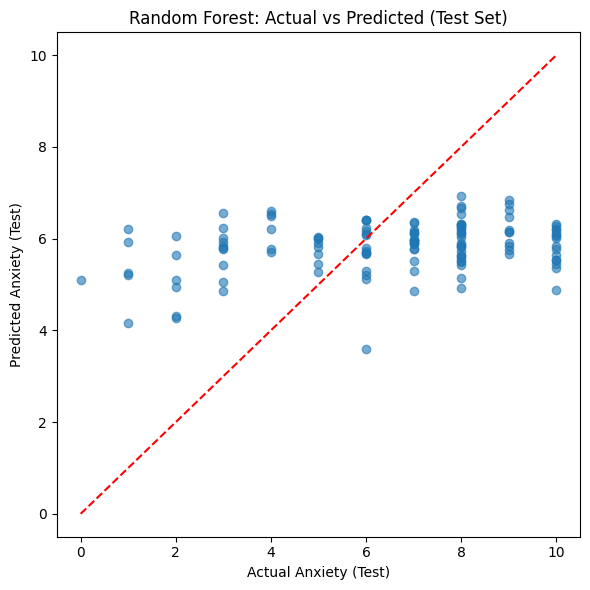

In [6]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)

line_min = min(y_test.min(), y_test_pred.min())
line_max = max(y_test.max(), y_test_pred.max())
plt.plot([line_min, line_max], [line_min, line_max], "r--")

plt.xlabel("Actual Anxiety (Test)")
plt.ylabel("Predicted Anxiety (Test)")
plt.title("Random Forest: Actual vs Predicted (Test Set)")
plt.tight_layout()
plt.show()

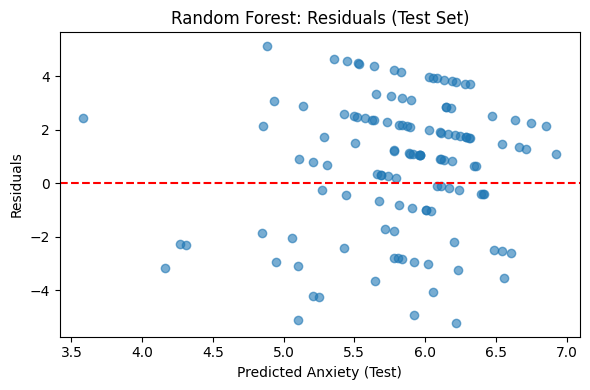

In [7]:
residuals_test = y_test - y_test_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_test_pred, residuals_test, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")

plt.xlabel("Predicted Anxiety (Test)")
plt.ylabel("Residuals")
plt.title("Random Forest: Residuals (Test Set)")
plt.tight_layout()
plt.show()